Importing Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import keras
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import imageio
import glob
from collections import Counter
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/MY_data/train'
TEST_PATH = '/content/drive/MyDrive/MY_data/test'
PREDICT_PATH = '/content/drive/MyDrive/MY_data/predict'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Fruits = ['Apple', 'Banana','avocado','cherry','kiwi','mango','orange','pinenapple','strawberries','watermelon']

for i,name in enumerate(Fruits):
  fruit_path = os.path.join(TRAIN_PATH, Fruits[i], '*')
  fruit_path = glob.glob(fruit_path)
  print("Found {0} images in folder {1}".format(len(fruit_path),name))


Found 230 imgs in folder Apple
Found 230 imgs in folder Banana
Found 230 imgs in folder avocado
Found 230 imgs in folder cherry
Found 230 imgs in folder kiwi
Found 231 imgs in folder mango
Found 230 imgs in folder orange
Found 230 imgs in folder pinenapple
Found 230 imgs in folder strawberries
Found 230 imgs in folder watermelon


In [ ]:
Fruits = ['apple', 'banana','avocado','cherry','kiwi','mango','orange','pinenapple','stawberries','watermelon']

for i,name in enumerate(Fruits):
  fruit_path = os.path.join(TEST_PATH, Fruits[i], '*')
  fruit_path = glob.glob(fruit_path)
  print("Found {0} in images folder {1}".format(len(fruit_path),name))

Found 89 in folder apple
Found 106 in folder banana
Found 105 in folder avocado
Found 105 in folder cherry
Found 105 in folder kiwi
Found 105 in folder mango
Found 97 in folder orange
Found 105 in folder pinenapple
Found 103 in folder stawberries
Found 105 in folder watermelon


In [ ]:
fruit_pth = os.path.join(PREDICT_PATH, '*')
fruit_pth = glob.glob(fruit_pth)

print("Predict Dataset, got {0} in folder {1}".format(len(fruit_pth),'Predict'))

Predict Dataset, got 48 in folder Predict


Decode categories

In [ ]:
shape_list = []


Fruits = ['Apple', 'Banana','avocado','cherry','kiwi','mango','orange','pinenapple','strawberries','watermelon']

for i,_ in enumerate(Fruits):
  pth = os.path.join(TRAIN_PATH, Fruits[i], '*')
  pth = glob.glob(pth)
  print(pth)
  for i in range(len(pth)):
    pic = imageio.imread(pth[i])
    shape_list.append(pic.shape)

shape_list.sort()
Counter(shape_list)


['/content/drive/MyDrive/MY_data/train/Apple/img_1851.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_3351.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_1601.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_541.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_631.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_5661.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_5281.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_1831.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_5971.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_1911.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_2841.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_3371.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_3481.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_4471.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_2721.jpeg', '/content/drive/MyDrive/MY_data/train/Apple/img_5001.jpeg', '/content/drive/MyDrive/MY_data/train/App

Counter({(1, 1): 1,
         (111, 453, 3): 1,
         (112, 450, 3): 1,
         (120, 420, 3): 1,
         (121, 416, 3): 1,
         (123, 409, 3): 1,
         (125, 402, 3): 1,
         (126, 398, 3): 1,
         (128, 394, 3): 1,
         (129, 389, 3): 2,
         (131, 384, 3): 1,
         (133, 377, 3): 1,
         (133, 378, 3): 1,
         (133, 379, 3): 1,
         (133, 380, 3): 1,
         (135, 374, 3): 1,
         (137, 366, 3): 1,
         (137, 367, 3): 2,
         (138, 364, 3): 1,
         (141, 357, 3): 1,
         (142, 355, 3): 3,
         (145, 346, 3): 1,
         (145, 347, 3): 1,
         (147, 343, 3): 4,
         (148, 340, 3): 2,
         (149, 222, 3): 1,
         (150, 335, 3): 1,
         (150, 336, 3): 1,
         (152, 332, 3): 1,
         (153, 329, 3): 4,
         (153, 330, 3): 1,
         (154, 327, 3): 1,
         (155, 324, 3): 2,
         (155, 326, 3): 2,
         (156, 323, 3): 1,
         (156, 324, 3): 1,
         (157, 320, 3): 1,
        

Resize the images to 150 x 150 x3

In [ ]:
x = []
y = []
size_img = 150

In [ ]:
temp_list = ["pinenapple","avocado","kiwi","cherry","watermelon","stawberries","orange","mango","banana","apple"]
j=0
while j<len(temp_list):
    for i in os.listdir(TEST_PATH+"/"+temp_list[j]):
        try:
            path = TRAIN_PATH+"/"+temp_list[j]+"/"+i
            img = cv2.imread(path)
            img = cv2.resize(img,(size_img,size_img))
            x.append(img)
            y.append(j)
        except:
            pass
    j=j+1

In [ ]:
x = np.array(x)

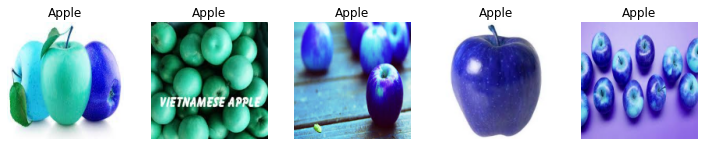

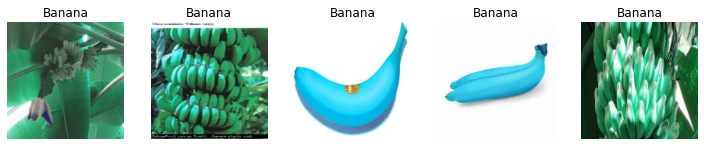

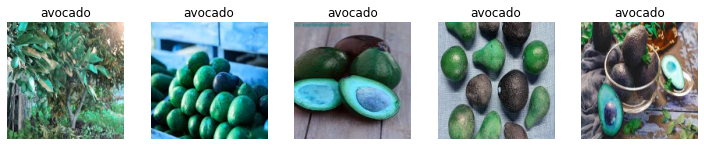

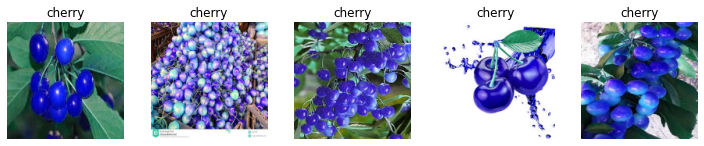

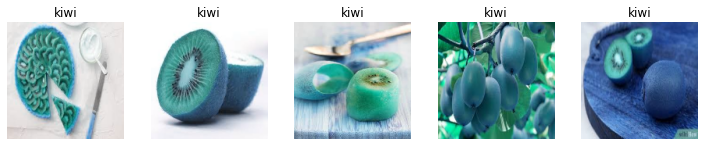

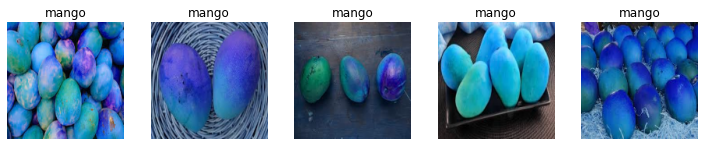

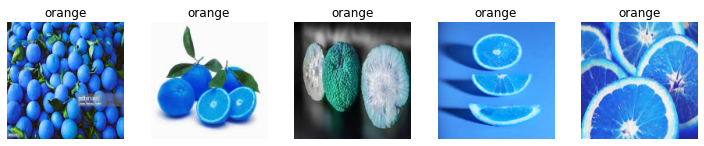

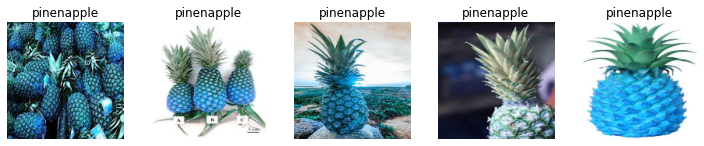

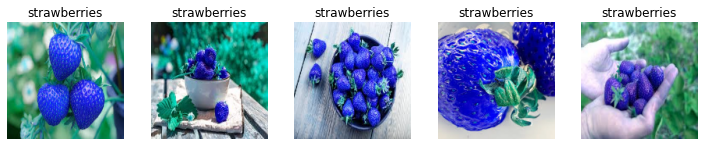

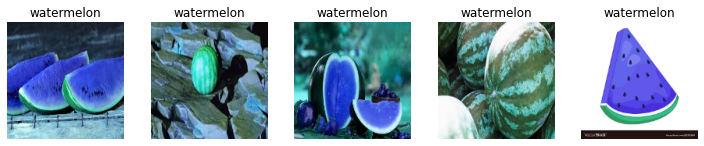

In [ ]:
Fruits = ['Apple', 'Banana','avocado','cherry','kiwi','mango','orange','pinenapple','strawberries','watermelon']
pt = (150, 150)

for i,name in enumerate(Fruits):
  pth = os.path.join(TRAIN_PATH, Fruits[i], '*')
  pth = glob.glob(pth)
  fig  = plt.figure(figsize=(15,15))

  fig.add_subplot(6, 6, 1)
  img = cv2.imread(pth[0])
  p = cv2.resize(img, pt, interpolation= cv2.INTER_LINEAR)
  plt.imshow(p)
  plt.axis('off')
  plt.title(name)

  fig.add_subplot(6, 6, 2)
  img = cv2.imread(pth[1])
  p = cv2.resize(img, pt, interpolation= cv2.INTER_LINEAR)
  plt.imshow(p)
  plt.axis('off')
  plt.title(name)

  fig.add_subplot(6, 6, 3)
  img = cv2.imread(pth[2])
  p = cv2.resize(img, pt, interpolation= cv2.INTER_LINEAR)
  plt.imshow(p)
  plt.axis('off')
  plt.title(name)

  fig.add_subplot(6, 6, 4)
  img = cv2.imread(pth[3])
  p = cv2.resize(img, pt, interpolation= cv2.INTER_LINEAR)
  plt.imshow(p)
  plt.axis('off')
  plt.title(name)

  fig.add_subplot(6, 6, 5)
  img = cv2.imread(pth[4])
  p = cv2.resize(img, pt, interpolation= cv2.INTER_LINEAR)
  plt.imshow(p)
  plt.axis('off')
  plt.title(name)

In [ ]:
y = to_categorical(y,num_classes = 10)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [ ]:
size_img = 150

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (size_img,size_img,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(10,activation="softmax"))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_84 (Bat  (None, 75, 75, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_84 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_71 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 37, 37, 128)    

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
epoch = 100
batch_size = 64

In [ ]:
history = model.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 2s 135ms/step - loss: 2.4745 - accuracy: 0.3851 - val_loss: 12.2789 - val_accuracy: 0.4595
Epoch 2/100
5/5 [==============================] - 0s 69ms/step - loss: 1.4847 - accuracy: 0.6554 - val_loss: 103.4289 - val_accuracy: 0.4054
Epoch 3/100
5/5 [==============================] - 0s 70ms/step - loss: 0.9155 - accuracy: 0.7500 - val_loss: 92.3197 - val_accuracy: 0.4054
Epoch 4/100
5/5 [==============================] - 0s 70ms/step - loss: 0.4134 - accuracy: 0.8716 - val_loss: 84.0914 - val_accuracy: 0.4054
Epoch 5/100
5/5 [==============================] - 0s 69ms/step - loss: 0.3535 - accuracy: 0.9122 - val_loss: 38.2588 - val_accuracy: 0.4054
Epoch 6/100
5/5 [==============================] - 0s 70ms/step - loss: 0.2504 - accuracy: 0.9122 - val_loss: 28.3851 - val_accuracy: 0.4324
Epoch 7/100
5/5 [==============================] - 0s 70ms/step - loss: 0.1066 - accuracy: 0.9662 - val_loss: 27.3390 - val_accuracy: 0.4595
Epoch 8/100

In [ ]:
init_notebook_mode(connected=True)
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
def plot(history):
    try:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['train', 'test'])
        plt.show()
    except:
        pass
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'])
    plt.show()

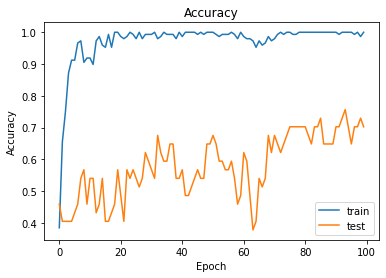

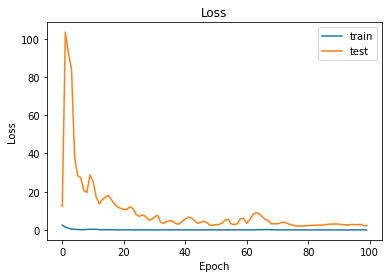

In [ ]:
plot(history)

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

In [ ]:
history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test),callbacks=[lr_schedule])

Epoch 1/100
5/5 [==============================] - 0s 81ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.2965 - val_accuracy: 0.7027 - lr: 1.0000e-08
Epoch 2/100
5/5 [==============================] - 0s 69ms/step - loss: 0.0154 - accuracy: 0.9932 - val_loss: 2.2948 - val_accuracy: 0.7027 - lr: 1.1220e-08
Epoch 3/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.2989 - val_accuracy: 0.7027 - lr: 1.2589e-08
Epoch 4/100
5/5 [==============================] - 0s 69ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 2.3039 - val_accuracy: 0.7027 - lr: 1.4125e-08
Epoch 5/100
5/5 [==============================] - 0s 71ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 2.3114 - val_accuracy: 0.7027 - lr: 1.5849e-08
Epoch 6/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0192 - accuracy: 0.9865 - val_loss: 2.3170 - val_accuracy: 0.7027 - lr: 1.7783e-08
Epoch 7/100
5/5 [==============================] - 0s 69ms

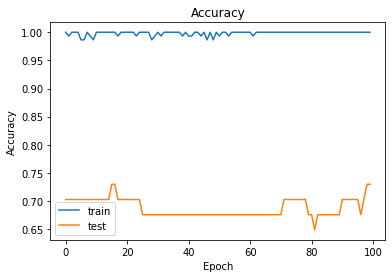

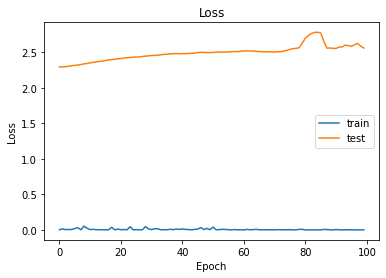

In [ ]:
plot(history)

In [ ]:
x = []
y = []
size_img=150

In [ ]:
temp_list = ["pinenapple","avocado","kiwi","cherry","watermelon","stawberries","orange","mango","banana","apple"]
j=0
while j<len(temp_list):
    for i in os.listdir(TEST_PATH+"/"+temp_list[j]):
        try:
            path = TEST_PATH+"/"+temp_list[j]+"/"+i
            img = cv2.imread(path)
            img = cv2.resize(img,(size_img,size_img))
            x.append(img)
            y.append(j)
        except:
            pass
    j=j+1

In [ ]:
y = to_categorical(y,num_classes = 10)

In [ ]:
x = np.array(x)

In [ ]:
Y_pred = model.predict(x)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y,axis=1)

33/33 [==============================] - 1s 18ms/step


In [ ]:
print("accuracy of Model on Test dataset is :",accuracy_score(Y_true, Y_pred_classes))

accuracy of Model on Test dataset is : 0.21560975609756097


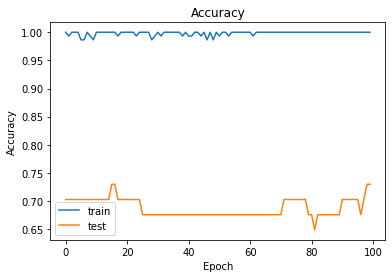

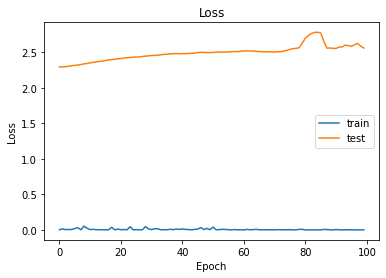

In [ ]:
plot(history)

In [ ]:
x = []
size_img = 150
for i in os.listdir(PREDICT_PATH):
    try:
        path = PREDICT_PATH+"/"+i
        img = cv2.imread(path)
        img = cv2.resize(img,(size_img,size_img))
        x.append(img)
    except:
        pass
x = np.array(x)
Y_pred = model.predict(x)
Y_pred_classes = np.argmax(Y_pred,axis=1)

lt = Y_pred_classes.tolist()
labels = {0 : "pinenapple", 1: "avocado", 2: "kiwi", 3: "cherry", 4: "watermelon",5: "strawberries", 6: "orange", 7: "mango", 8: "Banana", 9: "Apple"}
pred = []

for prediction in lt:
  for key in labels.keys():
    if prediction == key:
        pred.append(labels[key])

2/2 [==============================] - 0s 12ms/step


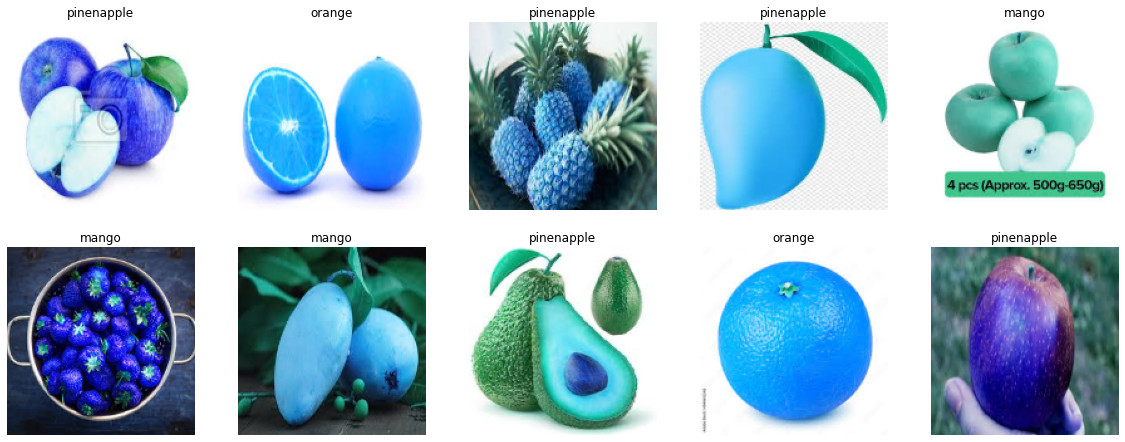

In [ ]:
fig  = plt.figure(figsize=(20,20))
for i in range(1,11):
  fig.add_subplot(5,5,i)
  plt.imshow(x[i])
  plt.axis('off')
  plt.title(pred[i])

In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.9,rho=0.9))

In [ ]:
history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 2s 124ms/step - loss: 0.0244 - val_loss: 14.4075
Epoch 2/100
5/5 [==============================] - 0s 69ms/step - loss: 2.1358 - val_loss: 4323.1143
Epoch 3/100
5/5 [==============================] - 0s 69ms/step - loss: 1.6675 - val_loss: 6165.9385
Epoch 4/100
5/5 [==============================] - 0s 69ms/step - loss: 0.8912 - val_loss: 15540.8965
Epoch 5/100
5/5 [==============================] - 0s 69ms/step - loss: 0.8353 - val_loss: 6949.4912
Epoch 6/100
5/5 [==============================] - 0s 69ms/step - loss: 0.6346 - val_loss: 3570.9224
Epoch 7/100
5/5 [==============================] - 0s 68ms/step - loss: 0.7409 - val_loss: 2369.2200
Epoch 8/100
5/5 [==============================] - 0s 69ms/step - loss: 0.5939 - val_loss: 1526.1094
Epoch 9/100
5/5 [==============================] - 0s 69ms/step - loss: 0.4344 - val_loss: 1043.7277
Epoch 10/100
5/5 [==============================] - 0s 69ms/step - loss: 0.4001 - val_loss:

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


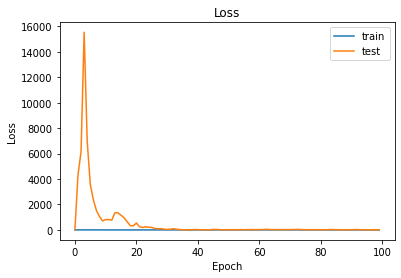

In [ ]:
plot(history)